In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
data = pd.read_excel('Book1 (1).xlsx', index_col='S .NO')
data

,Points
S .NO,
1,25.9
2,28.5
3,23.5
4,0.0
5,18.7
...,...
61,26.2
62,24.2
63,15.7


In [4]:
data.isnull().values.any()

False

In [5]:
zscore = StandardScaler()
data['zscore'] = zscore.fit_transform(data['Points'].values.reshape(-1,1))

In [6]:
minmax = MinMaxScaler(feature_range=(1,10))
data['minmax'] = minmax.fit_transform(data['Points'].values.reshape(-1,1))

In [7]:
data

,Points,zscore,minmax
S .NO,,,
1,25.9,0.599518,9.178947
2,28.5,1.200459,10.000000
3,23.5,0.044804,8.421053
4,0.0,-5.386775,1.000000
5,18.7,-1.064625,6.905263
...,...,...,...
61,26.2,0.668858,9.273684
62,24.2,0.206596,8.642105
63,15.7,-1.758018,5.957895


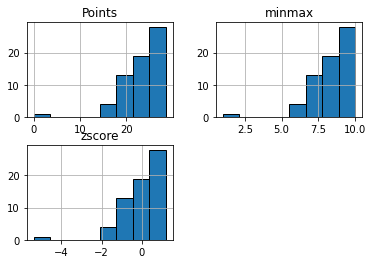

In [8]:
data.hist(bins=8, edgecolor='k')
plt.show()

In [9]:
data['categorical_width'] = pd.cut(data['Points'], bins=8, labels=range(8))

In [10]:
data['categorical_freq'] = pd.qcut(data['Points'], 8, labels=range(8))

In [11]:
data

,Points,zscore,minmax,categorical_width,categorical_freq
S .NO,,,,,
1,25.9,0.599518,9.178947,7,5
2,28.5,1.200459,10.000000,7,7
3,23.5,0.044804,8.421053,6,2
4,0.0,-5.386775,1.000000,0,0
5,18.7,-1.064625,6.905263,5,0
...,...,...,...,...,...
61,26.2,0.668858,9.273684,7,6
62,24.2,0.206596,8.642105,6,3
63,15.7,-1.758018,5.957895,4,0


In [12]:
def equifreq(arr1, m): 
    arri = []
    a = len(arr1) 
    n = int(a / m) 
    for i in range(0, m): 
        arr = [] 
        for j in range(i * n, (i + 1) * n): 
            if j >= a: 
                break
            arr = arr + [arr1[j]] 
        arri.append(arr)
    return arri
  
def equiwidth(arr1, m): 
    a = len(arr1) 
    w = int((max(arr1) - min(arr1)) / m) 
    min1 = min(arr1) 
    arr = [] 
    for i in range(0, m + 1): 
        arr = arr + [min1 + w * i] 
    arri=[] 
      
    for i in range(0, m): 
        temp = [] 
        for j in arr1: 
            if j > arr[i] and j < arr[i+1]: 
                temp += [j] 
        arri += [temp] 
    return arri

In [13]:
col = data['Points'].values.tolist()
m = 8

fbins = equifreq(col, m)
wbins = equiwidth(col, m)

In [14]:
bins = [fbins[i].copy() for i in range(len(fbins))]
for i in range(len(fbins)):
    mn = np.mean(np.array(fbins[i]))
    bins[i] = [mn] * len(bins[i])
np.array(bins)
bins

[[20.9125, 20.9125, 20.9125, 20.9125, 20.9125, 20.9125, 20.9125, 20.9125],
 [23.85, 23.85, 23.85, 23.85, 23.85, 23.85, 23.85, 23.85],
 [23.700000000000003,
  23.700000000000003,
  23.700000000000003,
  23.700000000000003,
  23.700000000000003,
  23.700000000000003,
  23.700000000000003,
  23.700000000000003],
 [22.8, 22.8, 22.8, 22.8, 22.8, 22.8, 22.8, 22.8],
 [24.4, 24.4, 24.4, 24.4, 24.4, 24.4, 24.4, 24.4],
 [22.5125, 22.5125, 22.5125, 22.5125, 22.5125, 22.5125, 22.5125, 22.5125],
 [25.125, 25.125, 25.125, 25.125, 25.125, 25.125, 25.125, 25.125],
 [22.737499999999997,
  22.737499999999997,
  22.737499999999997,
  22.737499999999997,
  22.737499999999997,
  22.737499999999997,
  22.737499999999997,
  22.737499999999997]]

In [15]:
bins = [fbins[i].copy() for i in range(len(fbins))]
for i in range(len(fbins)):
    mn = np.median(np.array(fbins[i]))
    bins[i] = [mn] * len(bins[i])
np.array(bins)
bins

[[23.05, 23.05, 23.05, 23.05, 23.05, 23.05, 23.05, 23.05],
 [24.05, 24.05, 24.05, 24.05, 24.05, 24.05, 24.05, 24.05],
 [23.450000000000003,
  23.450000000000003,
  23.450000000000003,
  23.450000000000003,
  23.450000000000003,
  23.450000000000003,
  23.450000000000003,
  23.450000000000003],
 [23.95, 23.95, 23.95, 23.95, 23.95, 23.95, 23.95, 23.95],
 [25.299999999999997,
  25.299999999999997,
  25.299999999999997,
  25.299999999999997,
  25.299999999999997,
  25.299999999999997,
  25.299999999999997,
  25.299999999999997],
 [22.950000000000003,
  22.950000000000003,
  22.950000000000003,
  22.950000000000003,
  22.950000000000003,
  22.950000000000003,
  22.950000000000003,
  22.950000000000003],
 [25.7, 25.7, 25.7, 25.7, 25.7, 25.7, 25.7, 25.7],
 [24.049999999999997,
  24.049999999999997,
  24.049999999999997,
  24.049999999999997,
  24.049999999999997,
  24.049999999999997,
  24.049999999999997,
  24.049999999999997]]

In [26]:
df2=pd.read_excel('Book1 (1).xlsx', 'ex2', skip_blank_lines=False, names='a')
df2

,a
0,NaN
1,A
2,A
3,B
4,B
5,B
6,B
7,B
8,B
9,C


In [27]:
df2['bfill'] = df2['a'].fillna(method='bfill')

In [28]:
df2['ffill'] = df2['a'].fillna(method='ffill')

In [36]:
df2['mode'] = df2['a'].fillna(df2['a'].mode()[0])

In [37]:
df2

,a,bfill,ffill,mode
0,NaN,A,NaN,B
1,A,A,A,A
2,A,A,A,A
3,B,B,B,B
4,B,B,B,B
5,B,B,B,B
6,B,B,B,B
7,B,B,B,B
8,B,B,B,B
9,C,C,C,C
